## Observations and Insights 

In [1]:
# Dependencies and Setup
%load_ext lab_black
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import warnings

warnings.filterwarnings("ignore")

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count_old = combined_data["Mouse ID"].nunique()
mice_count_old

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice_timepoint = combined_data.loc[
    combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"
].unique()

duplicate_df = pd.DataFrame({"Duplicate_ID": duplicate_mice_timepoint})
duplicate_df

,Duplicate_ID
0,g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse = combined_data[combined_data["Mouse ID"] == "g989"]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data["Mouse ID"] != "g989"]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = clean_data["Mouse ID"].nunique()
mice_count_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean_tumor = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_tumor = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_tumor = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

statistics_df = pd.DataFrame(
    {
        "mean_tumor": mean_tumor,
        "median_tumor": median_tumor,
        "var_tumor": var_tumor,
        "std_tumor": std_tumor,
        "sem_tumor": sem_tumor,
    }
)
statistics_df

,mean_tumor,median_tumor,var_tumor,std_tumor,sem_tumor
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
statistics_single = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    ["mean", "median", "var", "std", "sem"]
)
statistics_single

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_last_timepoint = pd.merge(
    clean_data, last_timepoint, on=["Mouse ID", "Timepoint"], how="right"
)
tumor_last_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_list:
    tumor_by_drug = tumor_last_timepoint.loc[
        tumor_last_timepoint["Drug Regimen"] == drug, "Tumor Volume (mm3)"
    ]

    # add subset (for plotting)
    tumor_volume_list.append(tumor_by_drug)

    # Determine outliers using upper and lower bounds
    quartiles = tumor_by_drug.quantile([0.25, 0.5, 0.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3 - q1
    print(f"For {drug}, interquartile range (IQR) is {(iqr):.3f};")
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    print(
        f"for {drug}, values below {(lower_bound):.3f} are potential outliers (according to Q1-1.5*IQR rule);"
    )
    print(
        f"for {drug}, values above {(upper_bound):.3f} are potential outliers (according to Q3+1.5*IQR rule).\n"
    )

For Capomulin, interquartile range (IQR) is 7.782;
for Capomulin, values below 20.705 are potential outliers (according to Q1-1.5*IQR rule);
for Capomulin, values above 51.832 are potential outliers (according to Q3+1.5*IQR rule).

For Ramicane, interquartile range (IQR) is 9.099;
for Ramicane, values below 17.913 are potential outliers (according to Q1-1.5*IQR rule);
for Ramicane, values above 54.307 are potential outliers (according to Q3+1.5*IQR rule).

For Infubinol, interquartile range (IQR) is 11.477;
for Infubinol, values below 36.833 are potential outliers (according to Q1-1.5*IQR rule);
for Infubinol, values above 82.741 are potential outliers (according to Q3+1.5*IQR rule).

For Ceftamin, interquartile range (IQR) is 15.578;
for Ceftamin, values below 25.355 are potential outliers (according to Q1-1.5*IQR rule);
for Ceftamin, values above 87.666 are potential outliers (according to Q3+1.5*IQR rule).



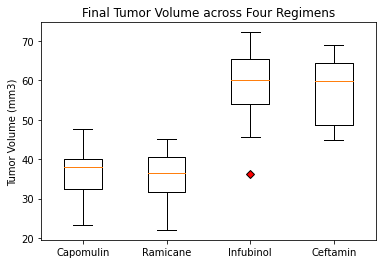

In [15]:
# Generate a box & whisker plot of the final tumor volume of each mouse across four regimens of interest

# formatting outliers' color and style
red_diamond = dict(markerfacecolor="r", marker="D")

# generatting the box & whisker plots
fig, ax = plt.subplots()
ax.set_title("Final Tumor Volume across Four Regimens")
ax.set_xticklabels(drug_list)
ax.set_ylabel("Tumor Volume (mm3)")
ax.boxplot(tumor_volume_list, flierprops=red_diamond)
plt.show()

## Line and Scatter Plots

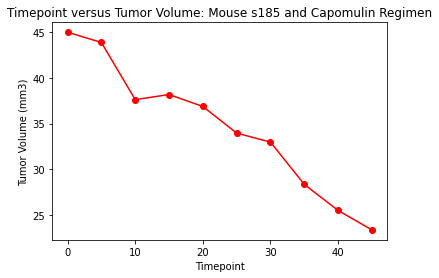

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Extracting time point versus tumor volume data for a mouse with Mouse ID = s185 and Drug Regimen = Capomulin
mouse_s185 = clean_data.loc[
    (clean_data["Mouse ID"] == "s185") & (clean_data["Drug Regimen"] == "Capomulin"),
    ["Timepoint", "Tumor Volume (mm3)"],
]

# Generating the line plot
plt.title("Timepoint versus Tumor Volume: Mouse s185 and Capomulin Regimen")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(
    mouse_s185["Timepoint"], mouse_s185["Tumor Volume (mm3)"], marker="o", color="red"
)
plt.show()

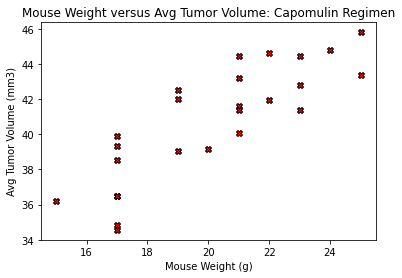

In [24]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Generating the x_axis, Mouse Weight for the Capomulin regimen
avg_weight_cap = (
    clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
    .groupby(clean_data["Mouse ID"])["Weight (g)"]
    .mean()
)

# Generating the y_axis, Average Tumor Volume for the Capomulin regimen
avg_tumor_cap = (
    clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
    .groupby(clean_data["Mouse ID"])["Tumor Volume (mm3)"]
    .mean()
)

# Generating the scatter plot
plt.title("Mouse Weight versus Avg Tumor Volume: Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.scatter(
    avg_weight_cap, avg_tumor_cap, marker="X", facecolors="red", edgecolors="black"
)
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen